# NASA - Global land-ocean temperature index

This graph illustrates the change in global surface temperature relative to 1951-1980 average temperatures. Nineteen of the warmest years have occurred since 2000, with the exception of 1998. The year 2020 tied with 2016 for the warmest year on record since record-keeping began in 1880 (source: NASA/GISS). This research is broadly consistent with similar constructions prepared by the Climatic Research Unit and the National Oceanic and Atmospheric Administration.

The time series below shows the five-year average variation of global surface temperatures. Dark blue indicates areas cooler than average. Dark red indicates areas warmer than average.

The “Global Temperature” figure on the home page dashboard shows global temperature change since 1880. One gets this number by subtracting the first data point in the chart from the latest data point.

Website : https://climate.nasa.gov/vital-signs/global-temperature/

Data source: NASA's Goddard Institute for Space Studies (GISS). 

Credit: NASA/GISS

## Input

Data source : https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt

In [138]:
import pandas

url_nasa_termperatures = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"

## Model

In [139]:
df = pandas.read_csv(url_nasa_termperatures, sep=r'     ', skiprows=5, names=["Year", "Delta", "Detla (Smoothed)"], engine="python")

df.tail(10)

,Year,Delta,Detla (Smoothed)
131,2011,0.61,0.67
132,2012,0.65,0.70
133,2013,0.68,0.74
134,2014,0.75,0.79
135,2015,0.90,0.83
136,2016,1.01,0.88
137,2017,0.92,0.91
138,2018,0.85,0.95
139,2019,0.98,0.98
140,2020,1.02,1.01


Here we can see the evolution of the average surface temperature anomaly from the last 10 years. <br>

Now lets visualize this information with a graph using plotly.

## Output

### Land-Ocean Temperature Index - Visualization

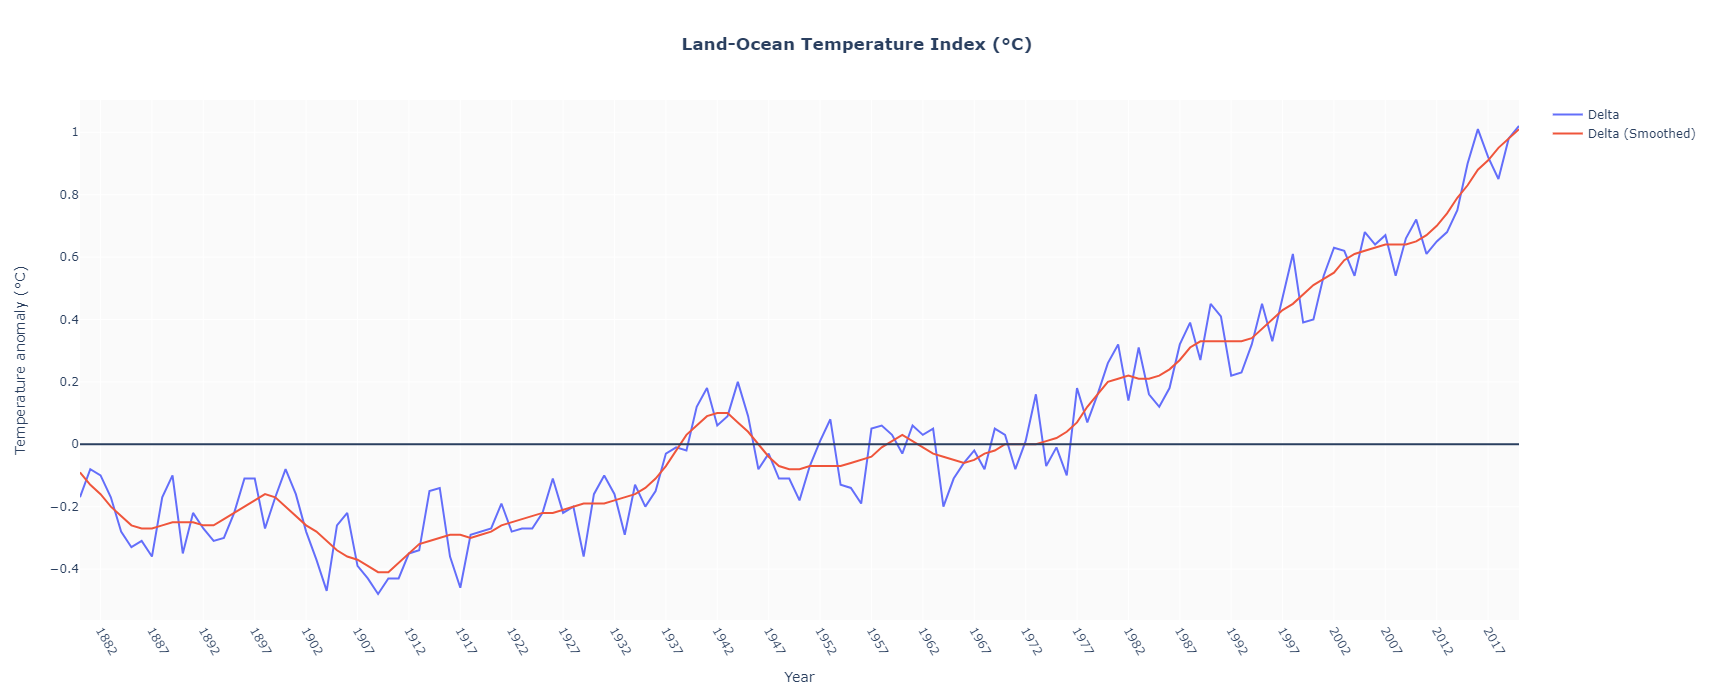

In [149]:
import plotly.graph_objects as go

fig = go.Figure(layout_title="<b>Land-Ocean Temperature Index (°C)</b>")
fig.add_trace(go.Scatter(
    x = df["Year"],
    y = df["Delta"],
    name="Delta",
))

fig.add_trace(go.Scatter(
    x = df["Year"],
    y = df["Detla (Smoothed)"],
    name="Delta (Smoothed)", 
))

fig.update_layout(
    autosize=False,
    width=1300,
    height=700,
    plot_bgcolor='rgb(250,250,250)',
    xaxis = dict(
    tickmode = 'linear',
    tick0 = 2,
    dtick = 5,
    ),
)
fig.update_yaxes(title_text="Temperature anomaly (°C)")
fig.update_xaxes(title_text="Year", tickangle=60)
fig.add_hline(y=0.0)
# To add maximum Temperature Delta line : uncomment the following line
# fig.add_hline(y=2.0)
fig.update_layout(title_x=0.5)

fig.show()

According to the Paris Agreement, the delta **should not be higher than 2**. As you can see here on the graph, it increasing quickly with the years specially since 1950.

### Land-Ocean Temperature Index - Visualization with Industrial Revolution Dates

We can now add the dates of the three last Industrial Revolutions :

    - Second 1910 : gaz and petrol
    - Third 1970 : internet
    - Forth 2000 : AI

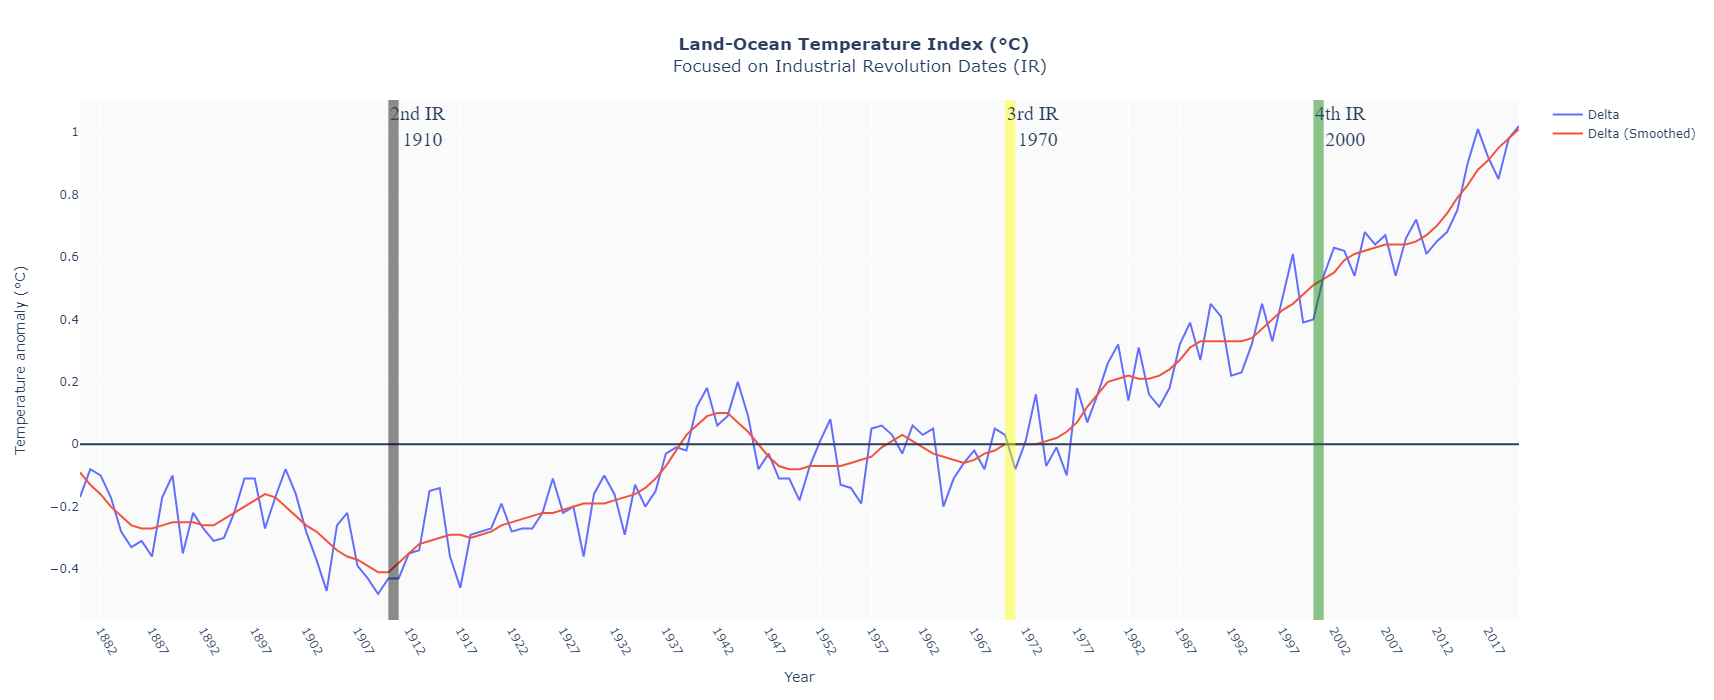

In [150]:
fig.add_vrect(x0="1910", x1="1911", annotation_text="2nd IR <br> 1910", annotation_position="top left",
annotation=dict(font_size=20, font_family="Times New Roman"),
fillcolor="black", opacity=0.45, line_width=0)

fig.add_vrect(x0="1970", x1="1971", annotation_text="3rd IR <br> 1970", annotation_position="top left",
annotation=dict(font_size=20, font_family="Times New Roman"),
fillcolor="yellow", opacity=0.45, line_width=0)

fig.add_vrect(x0="2000", x1="2001", annotation_text="4th IR <br> 2000", annotation_position="top left",
annotation=dict(font_size=20, font_family="Times New Roman"),
fillcolor="green", opacity=0.45, line_width=0)

fig.update_layout(title_x=0.5, title_text="<b>Land-Ocean Temperature Index (°C)</b> <br> Focused on Industrial Revolution Dates (IR)")

fig.show()

<br><br> **Idea to improve :**
- *Predict with machine learning the delta for the next 50 years*

**Authors :**
- Colyn TIDMAN 
- Dylan PICHON